### Questions of interest: Does using a continuous loss, such as the MSE, affect the pattern of the alpha values across levels as compared to a discrete loss like the negative log likelihood. Does it have an effect on the normalization patterns layers?

In [1]:
import pandas as pd
import re
import seaborn as sns

In [2]:
def mapper(oldname):
    m = re.search("(?<=params_).*", oldname)
    return m.group(0) if m is not None else oldname

trial_info = (pd.read_csv("../data/trial_info.csv")
    .drop(columns=["system_attrs_grid_id",
                   "system_attrs_search_space",
                   "state"])
    .rename(columns=mapper)
    .set_index("number"))

In [3]:
path = "../data/metrics/trial{:02}.csv"

data_frames = [
    (pd.read_csv(path.format(i))
        .assign(trial=i)
        .join(trial_info, on="trial"))
    for i in range(32)
]

metrics = pd.concat(data_frames, ignore_index=True)

In [4]:
metrics

,acc,epoch,step,trial,value,duration,batch_size,continuous,drop_rate,learning_rate,weight_decay
0,0.0104,0,3749,0,0.5,0 days 00:31:10.249173,16,True,0.2,0.0001,0.6
1,0.0180,1,7499,0,0.5,0 days 00:31:10.249173,16,True,0.2,0.0001,0.6
2,0.0263,2,11249,0,0.5,0 days 00:31:10.249173,16,True,0.2,0.0001,0.6
3,0.2098,3,14999,0,0.5,0 days 00:31:10.249173,16,True,0.2,0.0001,0.6
4,0.4420,4,18749,0,0.5,0 days 00:31:10.249173,16,True,0.2,0.0001,0.6
...,...,...,...,...,...,...,...,...,...,...,...
4795,0.0980,145,136801,31,0.5,0 days 00:09:17.690384,64,False,0.1,0.0010,0.6
4796,0.0980,146,137738,31,0.5,0 days 00:09:17.690384,64,False,0.1,0.0010,0.6
4797,0.0980,147,138675,31,0.5,0 days 00:09:17.690384,64,False,0.1,0.0010,0.6
4798,0.0980,148,139612,31,0.5,0 days 00:09:17.690384,64,False,0.1,0.0010,0.6


When continuous is true, the model was trained with the MSE,
and when continuous is false, the model was trained with the negative
loglikelihood.

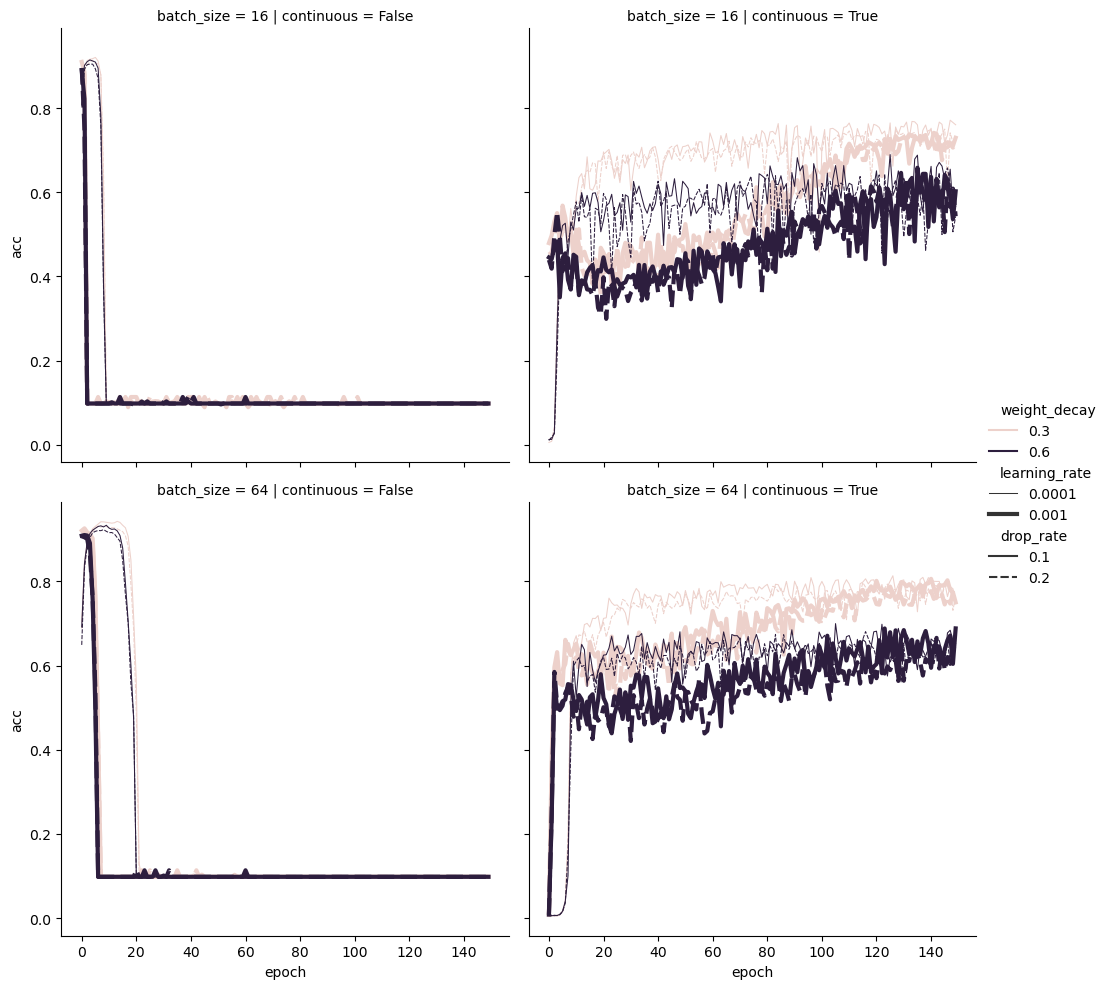

In [5]:
sns.relplot(
    data=metrics,
    x="epoch", y="acc",
    kind="line",
    col="continuous",
    row="batch_size",
    hue="weight_decay",
    size="learning_rate",
    style="drop_rate")